In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [60]:
# Initialize empty lists to store input features and target values
X, Ylist = [], []

# Randomly initialize weights for a linear model
w_1 = np.random.randint(-1, 1) + np.random.rand()
w_2 = np.random.randint(-1, 1) + np.random.rand()

# Generate 1000 data points
for i in range(1000):
    # Generate two input features with small random values 
    x_1 = np.random.randint(-1, 1) + np.random.rand()
    x_2 = np.random.randint(-1, 1) + np.random.rand()
    
    # Compute the target value using a simple linear combination
    Y = x_1 * w_1 + x_2 * w_2
    
    # Append the input features and target value to their respective lists
    X.append([x_1, x_2])
    Ylist.append(Y)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, Ylist, test_size=0.3, random_state=42)


In [61]:
def first_loss(X_train, y_train, w_1, w_2):
    loss = 0.0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        z = error * 5
        loss += -(np.cos(z)**3) - (np.sin(z)**2)
    return loss / (2 * len(y_train))

def second_loss(X_train, y_train, w_1, w_2):
    loss = 0.0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        loss += -1000 * np.sin(12 * error)
    return loss / (2 * len(y_train))

def gradian1_first(X_train, y_train, w_1, w_2):
    g = 0.0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        z = error * 5
        g += -5 * X_train[i][0] * np.sin(z) * np.cos(z) * (3*np.cos(z) + 2)
    return g / len(y_train)

def gradian2_first(X_train, y_train, w_1, w_2):
    g = 0.0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        z = error * 5
        g += -5 * X_train[i][1] * np.sin(z) * np.cos(z) * (3*np.cos(z) + 2)
    return g / len(y_train)

def gradian1_second(X_train, y_train, w_1, w_2):
    g = 0.0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        g += -12000 * X_train[i][0] * np.cos(12 * error)
    return g / len(y_train)

def gradian2_second(X_train, y_train, w_1, w_2):
    g = 0.0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        g += -12000 * X_train[i][1] * np.cos(12 * error)
    return g / len(y_train)


Final weights (w_1, w_2): (np.float64(0.7824311031698445), np.float64(0.06721358758185837))
Iterations: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201

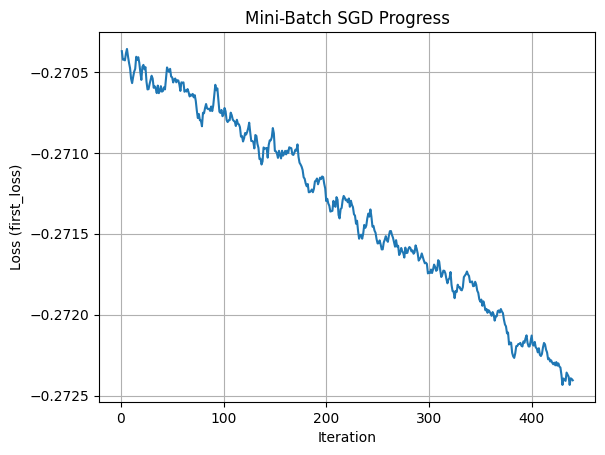

-0.8193472248852466 -0.34019105149700357


In [62]:
def sgd_minibatch(X_train, y_train, lr=0.001, epochs=20, batch_size=32):
    # Random initialization of weights
    w_1 = np.random.rand()
    w_2 = np.random.rand()

    n = len(X_train)
    iteration, loss1 = [], []
    iter = 0

    for epoch in range(epochs):
        # Shuffle the data at each epoch
        indices = np.random.permutation(n)
        X_shuffled = np.array(X_train)[indices]
        Y_shuffled = np.array(y_train)[indices]

        # Loop over mini-batches
        for i in range(0, n, batch_size):
            iter += 1
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]

            # Compute gradients **on mini-batch** (not whole data)
            g1 = gradian1_first(X_batch, Y_batch, w_1, w_2)
            g2 = gradian2_first(X_batch, Y_batch, w_1, w_2)

            # Gradient descent step
            w_1 -= lr * g1
            w_2 -= lr * g2

            # Track progress
            iteration.append(iter)
            loss1.append(first_loss(X_train, y_train, w_1, w_2))  # still use full data for loss

    return loss1, iteration, (w_1, w_2)

# Run mini-batch SGD
B = sgd_minibatch(X_train, y_train)

# Show final weights
print("Final weights (w_1, w_2):", B[2])

# Show iterations
print("Iterations:", B[1])

# Plot the loss curve
plt.plot(B[1], B[0])
plt.xlabel("Iteration")
plt.ylabel("Loss (first_loss)")
plt.title("Mini-Batch SGD Progress")
plt.grid(True)
plt.show()
#original weights 
print(w_1, w_2)


Final weights (w_1, w_2): (np.float64(0.2452590029940682), np.float64(0.6368606103101204))
Iterations: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


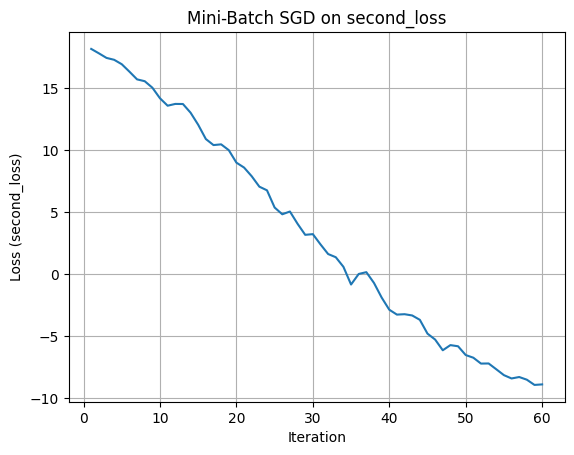

-0.8193472248852466 -0.34019105149700357


In [63]:
def sgd_minibatch(X_train, y_train, lr=0.00001, epochs=20, batch_size=256):
    # Initialize weights from normal distribution
    w_1 = np.random.rand()
    w_2 = np.random.rand()
    
    n = len(X_train)
    iteration, loss1 = [], []
    iter = 0

    for epoch in range(epochs):
        # Shuffle dataset at the start of each epoch
        indices = np.random.permutation(n)
        X_shuffled = np.array(X_train)[indices]
        Y_shuffled = np.array(y_train)[indices]

        # Loop through mini-batches
        for i in range(0, n, batch_size):
            iter += 1
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]

            # Compute gradients on the mini-batch (this is the crucial fix!)
            g1 = gradian1_second(X_batch, Y_batch, w_1, w_2)
            g2 = gradian2_second(X_batch, Y_batch, w_1, w_2)

            # Update weights using the gradients
            w_1 -= lr * g1
            w_2 -= lr * g2

            # Log iteration and loss (on full data)
            iteration.append(iter)
            loss1.append(second_loss(X_train, y_train, w_1, w_2))

    return loss1, iteration, (w_1, w_2)

# Run mini-batch SGD
B = sgd_minibatch(X_train, y_train)

# Display final weights
print("Final weights (w_1, w_2):", B[2])

# Display iteration indices
print("Iterations:", B[1])

# Plot the loss over time
plt.plot(B[1], B[0])
plt.xlabel("Iteration")
plt.ylabel("Loss (second_loss)")
plt.title("Mini-Batch SGD on second_loss")
plt.grid(True)
plt.show()

# This print is redundant — these are not the trained weights
print(w_1, w_2)
